<a href="https://colab.research.google.com/github/alexgathuri/Capstone-Data-Mining-the-Water-Table.ipynb/blob/main/Binary_Beasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Job Turnover analysis by Binary Beasts

Binary Beasts Team

Moffat Kirui

Alex Gathuri

Mary Mbugua

Wanjiru Kinyara

Vivian Katheu

Nathan Njonge


##1.0 Defining the Question

###a)Specifying the Question

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which are conducted by the company. Many people sign up for their training. The company wants to know which of these candidates really want to work for the company after training or if they will look for new employment. This is crucial because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience was acquired from the candidates' signup and enrollment.

This dataset is designed to understand the factors that lead a person to leave their current job and for HR research too. By building models that use the current credentials,demographics and experience data, we will predict the likelihood of a candidate to look for a new job or to continue working for the company, as well as interpreting the factors affecting the employee's decision.
We are working to build an accurate model that predicts whether a candidate will look for a new job or continue working for the company after training.

###b)Defining the Metric for Success

This project will be successful when we accurately predict whether a candidate will look for a new job or continue working for the company after training.

We hope to achieve atleast 80% accuracy with the models. The best model with the highest accuracy score will be the one we go with.

###c)Understanding the Context

17.6% of data scientists and analytics professionals changed jobs in 2018. For those who changed jobs, their average tenure at their previous position was 2.6 years. High rates of employee turnover constitute a severe challenge for the company due to the increased training expenses and hiring costs incurred.

Our goal is to understand the factors that lead a person to leave their current data science job by building models that use the current credentials,demographics and experience data to predict the likelihood of a candidate to look for a new job or continue working for the company.

###d)Recording the Experimental Design

1. To specify the question.

2. Find and deal with outliers and other anomalies such as missing values and duplicates.

3. Perform exploratory data analysis on the dataset. We will do both univariate and bivariate analysis.

4. Build different classification models to predict the outcome. 

5. Make recommendations and draw a conclusion.

###e)Data Relevance

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Development index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change


##2.0 Importing libraries

In [ ]:
# Importing the relevant libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

##3.0 Loading the data

In [ ]:
# Reading the dataset into our environment
data = pd.read_csv("aug_train.csv", encoding= 'latin1')

FileNotFoundError: ignored

##3.0 Checking the dataset

In [ ]:
# Checking the number of records 
data.shape

(19158, 14)

In [ ]:
# Previewing the first five records
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
# Previewing the last five records
data.tail(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [ ]:
#Checking the unique values in our columns

categorical_variables =['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
for column in categorical_variables:
  print(column)
  print(data[column].nunique())
  print(data[column].unique())
  print('\n')

city
123
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' '

In [ ]:
# Checking the datatypes for each column
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [ ]:
#Confirming the data types 
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [ ]:
#Accessing our dataset's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

##4.0 Tidying the Dataset


In [ ]:
#Dropping the columns we will not use in our analysis 

data.drop(['enrollee_id'], axis=1, inplace=True)

#Confirming if the columns have been dropped
data.head(0)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


###b) Accuracy

In [ ]:
# We can describe the data using the describe function to check on our descriptive statistics
data.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [ ]:
# Using the mean formula, confirm if the data is accurate

mean = data['training_hours'].mean()
print("The average Training hours in our data is: ", mean)

# The data indeed is accurate

The average Training hours in our data is:  65.36689633573442


###c) Completeness

In [ ]:
# Checking for null values
data.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
#Replacing the missing values in the gender, company size and company type columns with unknown 
data['gender'].replace(np.NaN,'unknown', inplace = True)
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,unknown,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,unknown,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
data['company_size'].replace(np.NaN,'unknown', inplace = True)
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,unknown,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,unknown,No relevent experience,Full time course,Graduate,STEM,5,unknown,NaN,never,83,0.0
3,city_115,0.789,unknown,No relevent experience,NaN,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
data['company_type'].replace(np.NaN,'unknown', inplace = True)
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,unknown,unknown,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,unknown,No relevent experience,Full time course,Graduate,STEM,5,unknown,unknown,never,83,0.0
3,city_115,0.789,unknown,No relevent experience,NaN,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
data.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size                 0
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
data = data.dropna()

Checking if the null values have been dropped

In [ ]:
data.shape

(15792, 13)

###d) Consistency

In [ ]:
# Checking if our dataset contains any duplicate values
data.duplicated().value_counts()

False    15747
True        45
dtype: int64

Dropping duplicates

In [ ]:
data = data.drop_duplicates()

In [ ]:
# Checking if duplicates have been dropped
data.duplicated().values.any()

False

###d) Uniformity

In [ ]:
#Checking our columns for uniformity

data = data.rename(columns = {'relevent_experience':'relevant_experience'})

In [ ]:
data.columns

Index(['city', 'city_development_index', 'gender', 'relevant_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [ ]:
#Converting the datatypes from object to category

convert_dict = {'city': 'category',
                'gender': 'category',
                'relevant_experience': 'category',
                'enrolled_university': 'category',
                'education_level': 'category',
                'major_discipline': 'category',
                'experience': 'category',
                'company_size': 'category',
                'company_type': 'category',
                'last_new_job': 'category',
                'target': 'category',

               }
  
data = data.astype(convert_dict)


###e) Checking for Outliers

In [ ]:
# Using the IQR formula
Q1 = data['city_development_index'].quantile(0.25)
Q3 = data['city_development_index'].quantile(0.75)
IQR = Q3 - Q1
((data['city_development_index'] < (Q1 - 1.5 * IQR)) | (data['city_development_index'] > (Q3 + 1.5 * IQR))).any()

True

In [ ]:
Q1 = data['training_hours'].quantile(0.25)
Q3 = data['training_hours'].quantile(0.75)
IQR = Q3 - Q1
((data['training_hours'] < (Q1 - 1.5 * IQR)) | (data['training_hours'] > (Q3 + 1.5 * IQR))).any()

True

<Figure size 648x360 with 0 Axes>

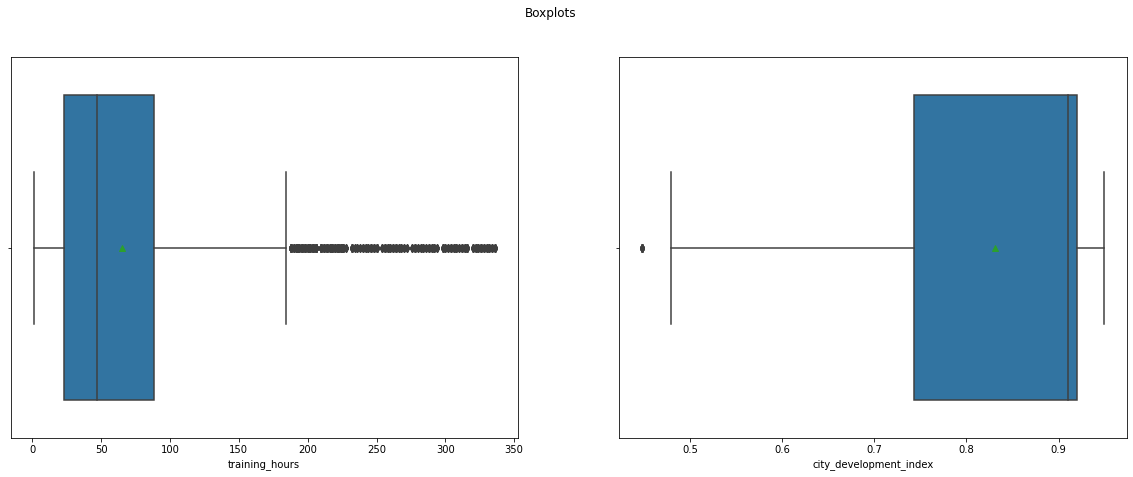

In [ ]:
# Visualizing the data outliers using boxplots
fig = plt.figure(figsize= (9,5),edgecolor='lightgreen')
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(data=data,x=data['training_hours'],ax=ax1,showmeans=True)
sns.boxplot(data=data,x=data['city_development_index'],ax=ax2,showmeans=True)


In [ ]:
#Exporting the cleaned dataset into a new file for further data visualization using Tableau
data.to_csv("clean_aug_train.csv")

##5.0 Exploratory Data Analysis

### Univariate Analysis

#### Categorical Variables

> ##### a) Frequency tables

In [ ]:
data['experience'].value_counts().to_frame()

,experience
>20,3019
5,1111
4,1031
6,977
3,936
10,867
7,864
9,847
2,730
8,681


In [ ]:
data['city'].value_counts().to_frame()

,city
city_103,3847
city_21,2218
city_16,1287
city_114,977
city_160,725
...,...
city_129,2
city_111,2
city_166,2
city_8,1


In [ ]:
data['gender'].value_counts().to_frame()

,gender
Male,11160
unknown,3315
Female,1137
Other,135


In [ ]:
data['relevant_experience'].value_counts().to_frame()

,relevant_experience
Has relevent experience,12311
No relevent experience,3436


In [ ]:
data['enrolled_university'].value_counts().to_frame()

,enrolled_university
no_enrollment,12127
Full time course,2642
Part time course,978


In [ ]:
data['company_type'].value_counts().to_frame()

,company_type
Pvt Ltd,8692
unknown,4218
Funded Startup,916
Public Sector,841
Early Stage Startup,508
NGO,470
Other,102


In [ ]:
data['company_size'].value_counts().to_frame()

,company_size
unknown,3979
50-99,2718
100-500,2317
10000+,1854
10/49,1272
1000-4999,1190
<10,1101
500-999,807
5000-9999,509


In [ ]:
data['major_discipline'].value_counts().to_frame()

,major_discipline
STEM,13948
Humanities,653
Other,364
Business Degree,322
Arts,248
No Major,212


> ##### b) Count Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


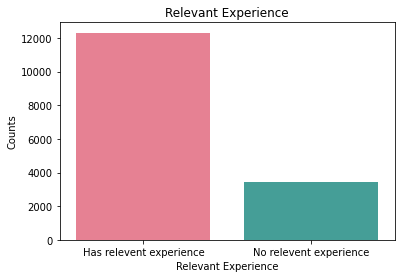

In [ ]:
#Count plots for relevant experience

sns.countplot(data['relevant_experience'], palette ='husl')
plt.title('Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


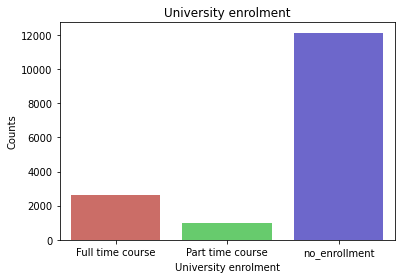

In [ ]:
# Count plots for the enrolled university
sns.countplot(data['enrolled_university'], palette ='hls')
plt.title('University enrolment')
plt.xlabel('University enrolment')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


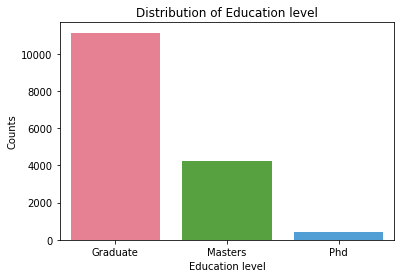

In [ ]:
# Countplot for the education_level

sns.countplot(data['education_level'], palette ='husl')
plt.title('Distribution of Education level')
plt.xlabel('Education level')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


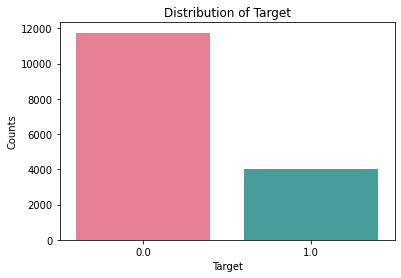

In [ ]:
# Countplot for the target

sns.countplot(data['target'], palette ='husl')
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


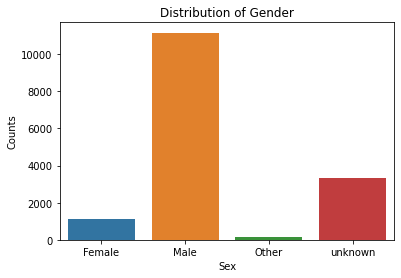

In [ ]:
# Countplots for the gender column

sns.countplot(data['gender'], palette ='tab10')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


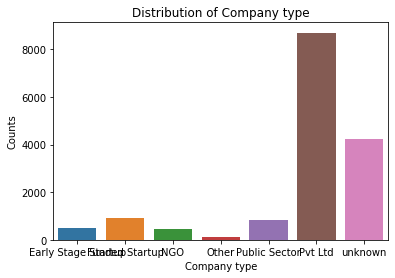

In [ ]:
# Countplots for the company type column

sns.countplot(data['company_type'], palette ='tab10')
plt.title('Distribution of Company type')
plt.xlabel('Company type')
plt.ylabel('Counts')
plt.show()

Most employees were from Private Limited companies.

> ##### c) Pie charts

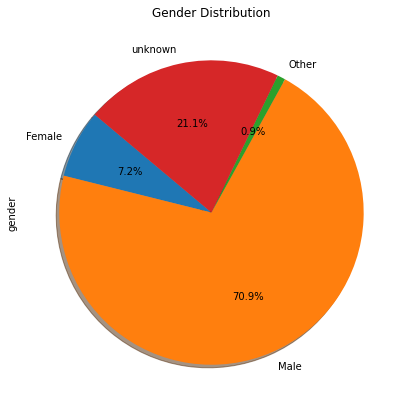

In [ ]:
# Pie chart for the gender
data['gender'].value_counts(sort=False).plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 140, figsize = (7,7))
plt.title('Gender Distribution')
plt.show()

The male gender constituted 90.1% of our dataset and the female gender constiituted 9%. This bias can be attributed to the fact that the data science field is a male dominated field.

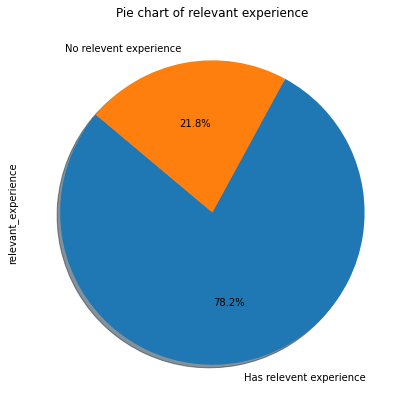

In [ ]:
# Pie chart for the relevent experience
data['relevant_experience'].value_counts(sort=False).plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 140, figsize = (7,7))
plt.title('Pie chart of relevant experience')
plt.show()

87.6% percent of the employees had relevant experience for the job.

#####d)Histograms

Text(0.5, 1.0, 'Histogram of CDI')

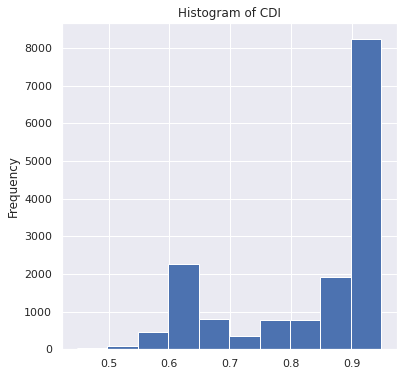

In [ ]:
# Histogram of CDI
plt.figure(figsize=(6,6))
sns.set_theme(style='darkgrid')
data['city_development_index'].plot.hist().set_title('Histogram of CDI')

City development index of 0.9 had the highest frequency and 0.5 the least. This goes to say that the cities included in our dataset were mostly developed.

In [ ]:
print(f'Skew: {data.city_development_index.skew()}')
print(f'Kurtosis: {data.city_development_index.kurt()}')


Skew: -1.0251554542221477
Kurtosis: -0.4935774300239659


Text(0.5, 1.0, 'Histogram of training_hours')

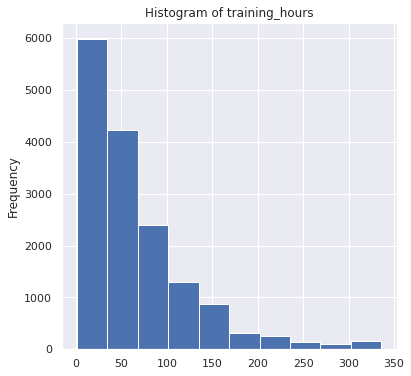

In [ ]:
# Histogram of training_hours
plt.figure(figsize=(6,6))
sns.set_theme(style='darkgrid')
data['training_hours'].plot.hist().set_title('Histogram of training_hours')

Majority of the employees had only completed a few training hours.

In [ ]:
print(f'Skew: {data.training_hours.skew()}')
print(f'Kurtosis: {data.training_hours.kurt()}')


Skew: 1.828757771202018
Kurtosis: 3.8963796875797936


#### Numerical Variables


> ##### a) Measures of Central Tendency

In [ ]:
# Summary Statistics for the Numerical Variables
data.describe()

,city_development_index,training_hours
count,15747.000000,15747.000000
mean,0.830693,65.275862
std,0.122902,60.038458
min,0.448000,1.000000
25%,0.743000,23.000000
50%,0.910000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [ ]:
# Summary Statistics for the Numerical Variables
data.describe()

,city_development_index,training_hours
count,15747.000000,15747.000000
mean,0.830693,65.275862
std,0.122902,60.038458
min,0.448000,1.000000
25%,0.743000,23.000000
50%,0.910000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [ ]:
#Calculating the mode for our categorical variables

categorical_variables =['city','gender','relevant_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

for column in categorical_variables:
  print(column,'mode: ',data[column].mode()[0]) 

city mode:  city_103
gender mode:  Male
relevant_experience mode:  Has relevent experience
enrolled_university mode:  no_enrollment
education_level mode:  Graduate
major_discipline mode:  STEM
experience mode:  >20
company_size mode:  unknown
company_type mode:  Pvt Ltd
last_new_job mode:  1


### Bivariate Analysis

####Categorical and Categorical

Text(0, 0.5, 'Number of people')

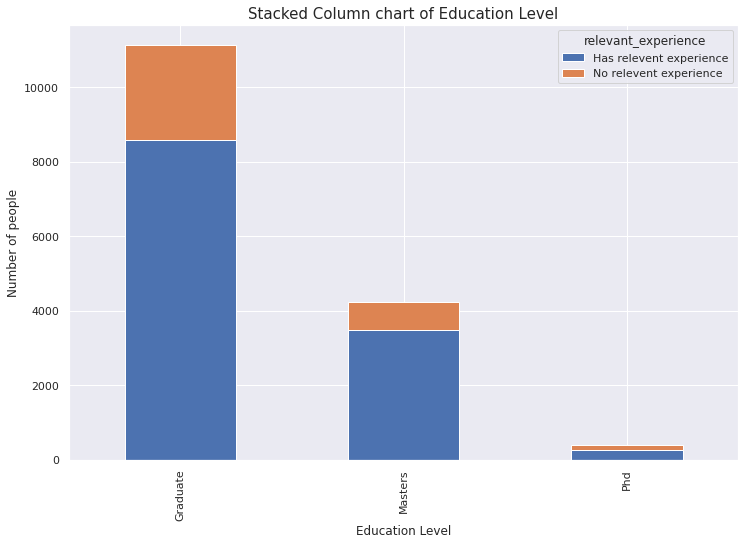

In [ ]:
# Stacked Column Chart 
pd.crosstab(data['education_level'],data['relevant_experience']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column chart of Education Level',fontsize=(15))
plt.xlabel('Education Level',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))

For each level of education, most employees had relevant experience.

Text(0, 0.5, 'Number of people')

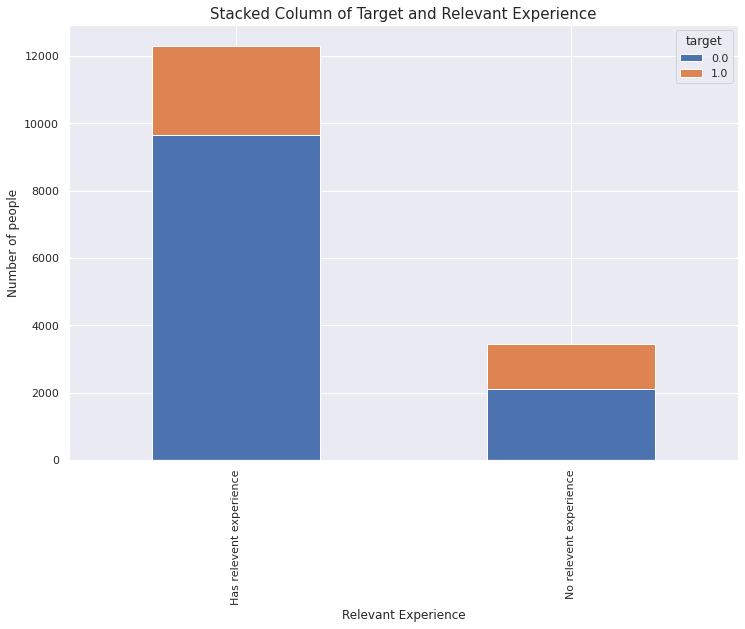

In [ ]:
# Stacked Column Chart 
pd.crosstab(data['relevant_experience'],data['target']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column of Target and Relevant Experience',fontsize=(15))
plt.xlabel('Relevant Experience',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))

Text(0, 0.5, 'Number of people')

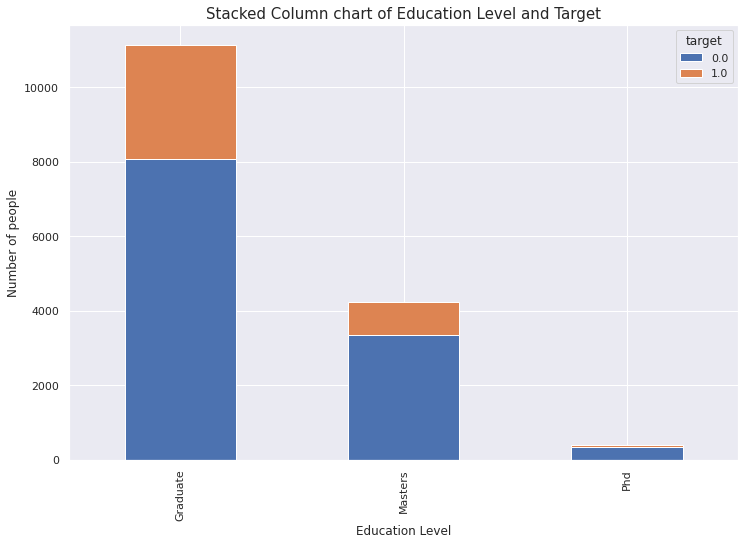

In [ ]:
# Stacked Column Chart 
pd.crosstab(data['education_level'],data['target']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column chart of Education Level and Target',fontsize=(15))
plt.xlabel('Education Level',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))

Text(0, 0.5, 'Number of people')

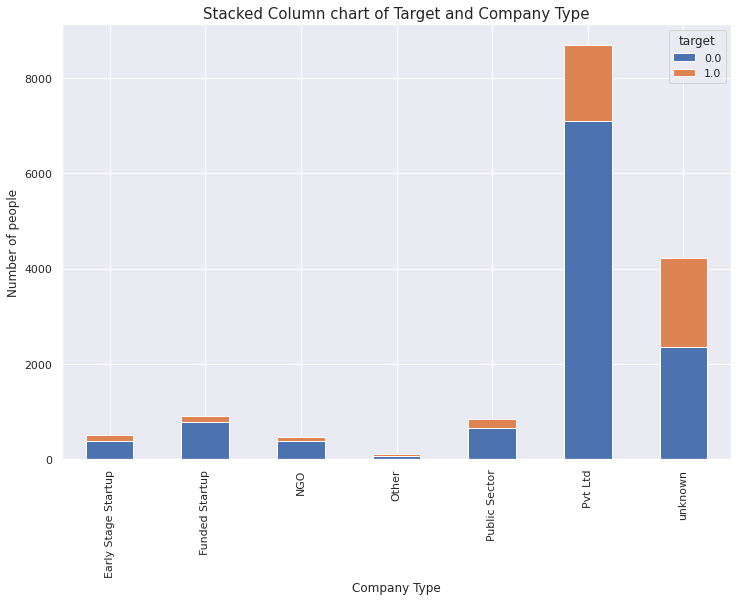

In [ ]:
# Stacked Column Chart 
pd.crosstab(data['company_type'],data['target']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column chart of Target and Company Type',fontsize=(15))
plt.xlabel('Company Type',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))

Text(0, 0.5, 'Number of people')

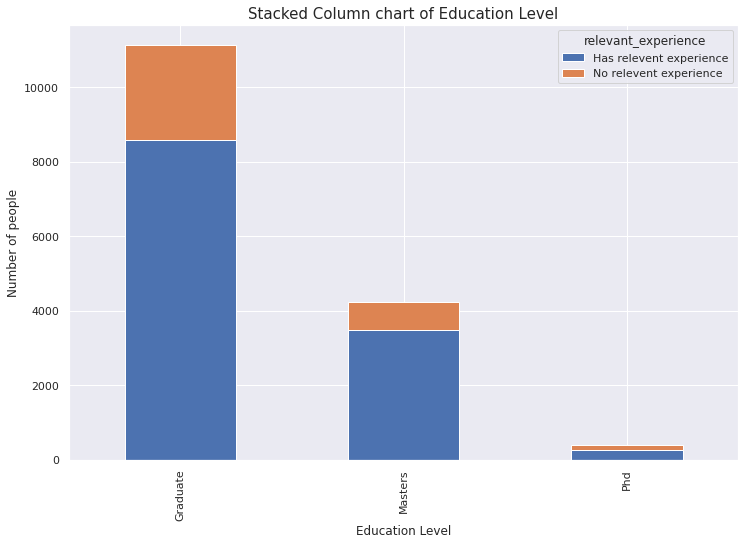

In [ ]:
# Stacked Column Chart 
pd.crosstab(data['education_level'],data['relevant_experience']).plot(kind="bar",stacked=True,figsize=(12,8))
plt.title('Stacked Column chart of Education Level',fontsize=(15))
plt.xlabel('Education Level',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))

#### Numerical and Numerical

#### Scatter plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


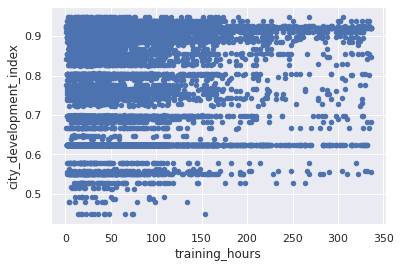

In [ ]:
data.plot(x='training_hours', y='city_development_index', kind = 'scatter')
plt.title
plt.show()

There was no correlation between the training hours and the city development index.

#### Correlation

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
categorical_variables =['city','gender','relevant_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
for column in categorical_variables:
  data[column]=le.fit_transform(data[column])

In [ ]:
data.head()

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,0,2,0,5,21,8,6,0,36,1.0
1,76,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,63,0.624,3,1,0,0,5,15,8,6,5,83,0.0
4,49,0.767,1,0,2,1,5,21,4,1,3,8,0.0
5,56,0.764,3,0,1,0,5,2,8,6,0,24,1.0


In [ ]:
data.corr()

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,1.000000,-0.329221,0.053783,0.002222,-0.071920,-0.000447,0.114440,-0.037449,0.024520,0.022701,-0.018977,0.007074
city_development_index,-0.329221,1.000000,-0.151487,-0.052460,0.169352,0.073704,-0.123625,0.040889,-0.039441,-0.024488,0.041672,0.004916
gender,0.053783,-0.151487,1.000000,0.072415,-0.101609,0.002367,0.037048,-0.005304,0.036339,0.033735,-0.009336,0.005514
relevant_experience,0.002222,-0.052460,0.072415,1.000000,-0.373796,-0.013413,-0.057227,-0.010441,0.262530,0.134300,0.091768,-0.023356
enrolled_university,-0.071920,0.169352,-0.101609,-0.373796,1.000000,0.099172,-0.086806,0.029859,-0.200856,-0.086752,0.000706,0.011236
education_level,-0.000447,0.073704,0.002367,-0.013413,0.099172,1.000000,0.015656,0.031777,-0.041116,-0.039840,0.026763,-0.012398
major_discipline,0.114440,-0.123625,0.037048,-0.057227,-0.086806,0.015656,1.000000,-0.000725,-0.032085,0.000096,-0.004370,0.004157
experience,-0.037449,0.040889,-0.005304,-0.010441,0.029859,0.031777,-0.000725,1.000000,0.034337,0.015381,0.076443,-0.007524
company_size,0.024520,-0.039441,0.036339,0.262530,-0.200856,-0.041116,-0.032085,0.034337,1.000000,0.307858,0.082158,-0.008841
company_type,0.022701,-0.024488,0.033735,0.134300,-0.086752,-0.039840,0.000096,0.015381,0.307858,1.000000,0.125357,-0.013259


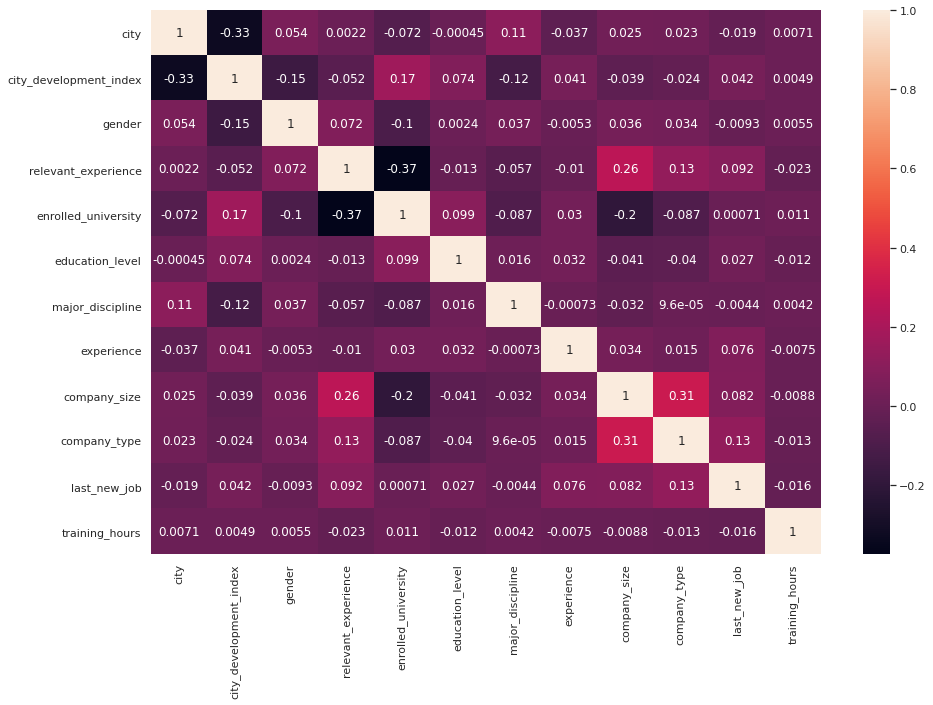

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

There was no strong correlation between any two variables. Most of them potrayed a weak correlation.

Numerical and Categorical

##6.0 Solution Implementation

In [ ]:
# dropping the gender column
data.drop('gender', axis=1, inplace=True)
data.head()

,city,city_development_index,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,0,2,0,5,21,8,6,0,36,1.0
1,76,0.776,1,2,0,5,6,4,5,4,47,0.0
2,63,0.624,1,0,0,5,15,8,6,5,83,0.0
4,49,0.767,0,2,1,5,21,4,1,3,8,0.0
5,56,0.764,0,1,0,5,2,8,6,0,24,1.0


In [ ]:
# splitting data into features and label

X=data.iloc[:,:-1].values
y=data.iloc[:,-1]

In [ ]:
# finding the correlation between the independent variables
features = data.drop('target', axis  =1)
correlations = features.corr()
correlations

# computing VIF score for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,city,city_development_index,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,1.131244,0.359971,0.024792,0.019995,-0.028876,-0.081795,0.028475,-0.016505,-0.015788,0.005600,-0.009487
city_development_index,0.359971,1.163986,0.008955,-0.150288,-0.069760,0.091316,-0.024603,0.006639,0.006509,-0.039736,-0.008288
relevant_experience,0.024792,0.008955,1.237380,0.426701,-0.036805,0.099372,0.017113,-0.214243,-0.053881,-0.088984,0.019121
enrolled_university,0.019995,-0.150288,0.426701,1.234090,-0.099973,0.116275,-0.023814,0.131092,0.006594,-0.040052,-0.004596
education_level,-0.028876,-0.069760,-0.036805,-0.099973,1.018946,-0.031560,-0.027244,0.021392,0.032987,-0.025194,0.013595
major_discipline,-0.081795,0.091316,0.099372,0.116275,-0.031560,1.038154,-0.007884,0.039457,-0.011285,-0.010459,-0.003589
experience,0.028475,-0.024603,0.017113,-0.023814,-0.027244,-0.007884,1.010863,-0.040837,-0.000431,-0.073057,0.006358
company_size,-0.016505,0.006639,-0.214243,0.131092,0.021392,0.039457,-0.040837,1.187962,-0.319074,-0.035917,-0.000898
company_type,-0.015788,0.006509,-0.053881,0.006594,0.032987,-0.011285,-0.000431,-0.319074,1.121893,-0.110801,0.009490
last_new_job,0.005600,-0.039736,-0.088984,-0.040052,-0.025194,-0.010459,-0.073057,-0.035917,-0.110801,1.033207,0.012371


There was no need to drop any column seeing as the VIF scores were lower than 5.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


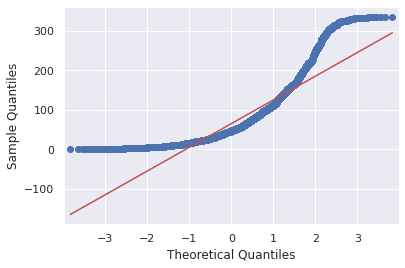

In [ ]:
#Checking the normality of our numerical variables
# Normality test

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(data['training_hours'], line='s')
pyplot.show()

Our training hours column was normally distributed.

<function matplotlib.pyplot.show>

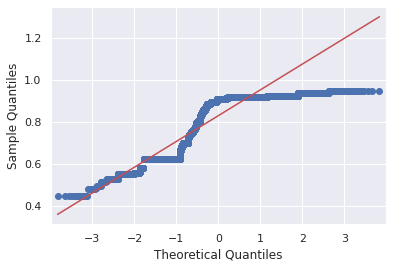

In [ ]:
qqplot(data['city_development_index'], line='s')
pyplot.show

The CDI column was not normally distributed.

In [ ]:
#Splitting our data into the train and test split. We will use a 70-30 split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,stratify=y, random_state=25)

#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Logistic Regression

In [ ]:
#Logistic Regression - Baseline model

# define models and parameters

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

LogReg = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.766538 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.766538 (0.008369) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760950 (0.006771) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.766516 (0.008464) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.766474 (0.008388) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760293 (0.005722) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.766389 (0.008493) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.766241 (0.008453) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760526 (0.005418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.765987 (0.008381) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.763193 (0.006186) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759742 (0.004965) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.763278 (0.006110) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.759764 (0.005416) wit

In [ ]:
# Using our model to make a prediction

LogReg = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')

LogReg.fit(X_train,y_train)

y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7621164021164021
[[3286  241]
 [ 883  315]]
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      3527
         1.0       0.57      0.26      0.36      1198

    accuracy                           0.76      4725
   macro avg       0.68      0.60      0.61      4725
weighted avg       0.73      0.76      0.73      4725



We achieved an accuracy of 76.21% with our logistic regression model.

###Support Vector Machines

In [ ]:
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.746428 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.746428 (0.000047) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.746428 (0.000047) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.617990 (0.015116) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.746428 (0.000047) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.746428 (0.000047) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.630914 (0.004884) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.746428 (0.000047) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.746428 (0.000047) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.735919 (0.018230) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
# Using our model to make a prediction

SvmClass = SVC(C= 10, gamma='scale',kernel='poly')

SvmClass.fit(X_train,y_train)

y_pred = SvmClass.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7773544973544974
[[3104  423]
 [ 629  569]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      3527
         1.0       0.57      0.47      0.52      1198

    accuracy                           0.78      4725
   macro avg       0.70      0.68      0.69      4725
weighted avg       0.77      0.78      0.77      4725



The SVM model gave us an accuracy of 77.82%.

###K-Nearest Neighbours

In [ ]:
#K-Nearest Neighbours model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.760187 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
0.692979 (0.004168) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.692979 (0.004168) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.730129 (0.003028) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.726890 (0.003066) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.744375 (0.002073) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.741432 (0.001665) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.749878 (0.002221) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.747381 (0.001510) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.752503 (0.002793) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.750662 (0.002014) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.754599 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

knnclassifier = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 19, weights ='uniform')
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7748148148148148
[[3071  456]
 [ 608  590]]
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      3527
         1.0       0.56      0.49      0.53      1198

    accuracy                           0.77      4725
   macro avg       0.70      0.68      0.69      4725
weighted avg       0.77      0.77      0.77      4725



K- Nearest Neighbours model scores an accuracy of 77.18%.

### Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765754 using {'alpha': 0.1}
0.765754 (0.007946) with: {'alpha': 0.1}
0.765754 (0.007932) with: {'alpha': 0.2}
0.765712 (0.007902) with: {'alpha': 0.3}
0.765712 (0.007953) with: {'alpha': 0.4}
0.765691 (0.007959) with: {'alpha': 0.5}
0.765670 (0.007950) with: {'alpha': 0.6}
0.765564 (0.007967) with: {'alpha': 0.7}
0.765564 (0.008010) with: {'alpha': 0.8}
0.765585 (0.008010) with: {'alpha': 0.9}
0.765543 (0.007999) with: {'alpha': 1.0}


In [ ]:
# Using our model to make a prediction

ridgeClass = RidgeClassifier(alpha=0.1)

ridgeClass= ridgeClass.fit(X_train,y_train)

y_pred = ridgeClass.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7621164021164021
[[3302  225]
 [ 899  299]]
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.85      3527
         1.0       0.57      0.25      0.35      1198

    accuracy                           0.76      4725
   macro avg       0.68      0.59      0.60      4725
weighted avg       0.73      0.76      0.73      4725



Ridge classifier gives an accuracy score of 76.21%

###Naive Bayes Classifier

In [ ]:
#Naive Bayes Classifier

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB() 
model = clf.fit(X_train, y_train)
# Predicting our test predictors
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7424338624338624
[[3298  229]
 [ 988  210]]
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84      3527
         1.0       0.48      0.18      0.26      1198

    accuracy                           0.74      4725
   macro avg       0.62      0.56      0.55      4725
weighted avg       0.70      0.74      0.70      4725



Naive Bayes Classifier had a lower accuracy of 74.47%.

### Decision Tree Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# define models and parameters
model = DecisionTreeClassifier(random_state=40)
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_features = ["auto" , "sqrt", "log2"]

# define grid search
grid = dict(criterion=criterion,splitter=splitter,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.721421 using {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.721285 (0.007588) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
0.714571 (0.005835) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}
0.721285 (0.007588) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.714571 (0.005835) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.721285 (0.007588) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.714571 (0.005835) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.721421 (0.004903) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.716884 (0.004403) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
0.721421 (0.004903) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.716884 (0.004403) with: {'criterion': 'entropy', 'max_features'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_features = 'auto', splitter= 'best')
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

0.9984576301941571 0.71


Decision trees obtained a 99% accuracy on the train data due to overfitting, and 72% on the test data.

Decision Tree Pruning

In [ ]:
path = tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 0.00000000e+00, 5.64830565e-05, 5.64830565e-05,
       6.04850904e-05, 6.84891582e-05, 6.84891582e-05, 6.84891582e-05,
       6.84891582e-05, 6.84891582e-05, 6.84891582e-05, 7.96083969e-05,
       8.13461216e-05, 8.74411859e-05, 8.77239495e-05, 8.84624961e-05,
       9.16049944e-05, 9.35697559e-05, 9.39418765e-05, 9.40422232e-05,
       9.43068876e-05, 9.43068876e-05, 9.81404614e-05, 9.81404614e-05,
       9.81404614e-05, 9.81404614e-05, 9.81404614e-05, 9.81404614e-05,
       9.81404614e-05, 9.81404614e-05, 9.81404614e-05, 9.81404614e-05,
       9.81404614e-05, 9.81404614e-05, 9.81404614e-05, 9.81404614e-05,
       9.81404614e-05, 9.81404614e-05, 9.81404614e-05, 9.81404614e-05,
       9.81404614e-05, 9.81404614e-05, 9.81404614e-05, 9.86326335e-05,
       9.86326335e-05, 9.93549787e-05, 9.95817348e-05, 9.97807664e-05,
       9.99777718e-05, 9.99777718e-05, 1.00598853e-04, 1.02733737e-04,
       1.02766797e-04, 1.03124343e-04, 1.03508777e-04, 1.03508777e-04,
      

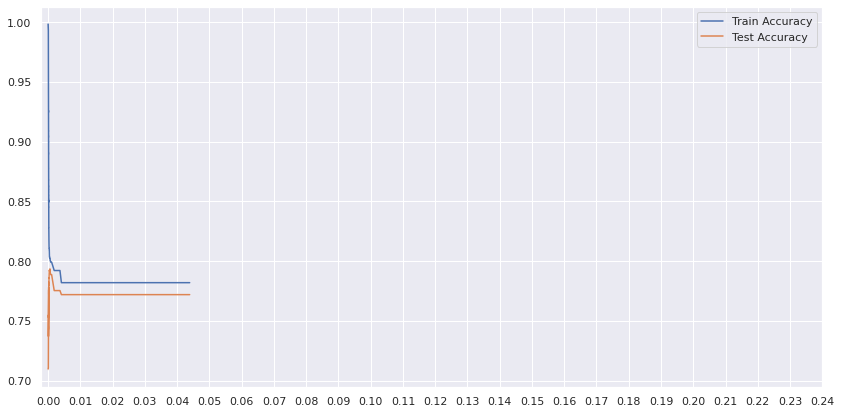

In [ ]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
  tree = DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train,y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [ ]:
# instantiate our object
tree= DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
# fitting our model
tree.fit(X_train,y_train)
# evaluating our model performance
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))
report= classification_report(y_test,y_test_pred)
print(report)

0.7820722191979677 0.7720634920634921
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86      3527
         1.0       0.57      0.39      0.46      1198

    accuracy                           0.77      4725
   macro avg       0.69      0.65      0.66      4725
weighted avg       0.75      0.77      0.76      4725



After performing decision tree pruning, we achieved a slightly higher accuracy of 77.20%.

####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [3,4,5,6]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.794774 using {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 100}
0.763337 (0.005777) with: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}
0.768554 (0.004917) with: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
0.761568 (0.003856) with: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 1000}
0.762112 (0.005223) with: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}
0.764063 (0.003641) with: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
0.760933 (0.003715) with: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 1000}
0.780666 (0.012366) with: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
0.775903 (0.007583) with: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
0.779668 (0.006763) with: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 1000}
0.780167 (0.003446) with: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 10}
0.777490 (0.004022) with: {'max_depth'

In [ ]:
# Using our model to make a prediction

forest = RandomForestClassifier(max_depth = 6, max_features= 'log2', n_estimators=1000)

forest = forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7866666666666666
[[3066  461]
 [ 547  651]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3527
         1.0       0.59      0.54      0.56      1198

    accuracy                           0.79      4725
   macro avg       0.72      0.71      0.71      4725
weighted avg       0.78      0.79      0.78      4725



The Random Forest model achieves an accuracy score of 78.64%.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


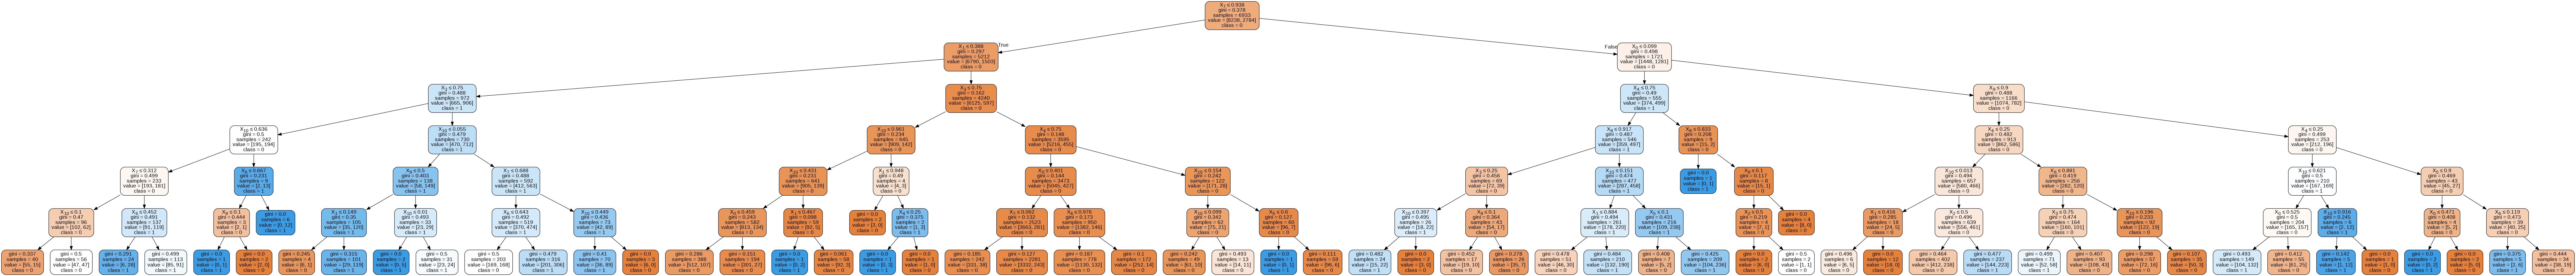

In [ ]:
#Visualizing our model

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

test_features = ['city','gender','relevant_experience','enrolled_university',
                 'education_level','major_discipline','experience','company_size','company_type',
                 'last_new_job','city_development_index','training_hours']

#Picking a random tree
tree = forest.estimators_[50]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('training.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('city', 0.11), ('gender', 0.43), ('relevant_experience', 0.03), ('enrolled_university', 0.03), ('education_level', 0.01), ('major_discipline', 0.01), ('experience', 0.04), ('company_size', 0.19), ('company_type', 0.12), ('last_new_job', 0.01), ('city_development_index', 0.02)]

Variable: gender               Importance: 0.43
Variable: company_size         Importance: 0.19
Variable: company_type         Importance: 0.12
Variable: city                 Importance: 0.11
Variable: experience           Importance: 0.04
Variable: relevant_experience  Importance: 0.03
Variable: enrolled_university  Importance: 0.03
Variable: city_development_index Importance: 0.02
Variable: education_level      Importance: 0.01
Variable: major_discipline     Importance: 0.01
Variable: last_new_job         Importance: 0.01


#### Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# define models and parameters
model = AdaBoostClassifier(random_state=40)
n_estimators = [100, 200, 300]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.778488 using {'n_estimators': 300}
0.777309 (0.001471) with: {'n_estimators': 100}
0.777944 (0.001069) with: {'n_estimators': 200}
0.778488 (0.001037) with: {'n_estimators': 300}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),
                          n_estimators=100, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy = accuracy_score(y_test,y_pred_ada)
print(accuracy)

report= classification_report(y_test,y_pred_ada)
print(report)

0.724021164021164
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      3527
         1.0       0.45      0.40      0.42      1198

    accuracy                           0.72      4725
   macro avg       0.63      0.62      0.62      4725
weighted avg       0.71      0.72      0.72      4725



#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# define models and parameters
model = GradientBoostingClassifier(random_state=40)
n_estimators = [100, 200, 300]
learning_rate = [0.1, 1]


# define grid search
grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795500 using {'learning_rate': 0.1, 'n_estimators': 100}
0.795500 (0.002424) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.793050 (0.001610) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.790419 (0.001376) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.770731 (0.004609) with: {'learning_rate': 1, 'n_estimators': 100}
0.764380 (0.004243) with: {'learning_rate': 1, 'n_estimators': 200}
0.760343 (0.005317) with: {'learning_rate': 1, 'n_estimators': 300}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

accuracy = accuracy_score(y_test,y_pred_gbr)
print(accuracy)
report= classification_report(y_test,y_pred_gbr)
print(report)


0.7908994708994709
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3527
         1.0       0.59      0.56      0.57      1198

    accuracy                           0.79      4725
   macro avg       0.72      0.71      0.72      4725
weighted avg       0.79      0.79      0.79      4725



Gradient oosting classifier gave us an accuracy score of 78.66%.

#### XGBoost Classifier

In [ ]:
# import our library
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=6)

# fit the model with the training data
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7883597883597884
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3527
         1.0       0.59      0.56      0.57      1198

    accuracy                           0.79      4725
   macro avg       0.72      0.71      0.72      4725
weighted avg       0.78      0.79      0.79      4725



XGBoost Classifier scored an accuracy of 78.83%

###Multi Layer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.776337 using {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.748015 (0.004355) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.768463 (0.006840) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.746745 (0.002292) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.770686 (0.007915) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.748650 (0.002459) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.769543 (0.006839) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant',

In [ ]:
# Instatiating the model
mlp = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (10, 30, 10), learning_rate= 'adaptive', solver='adam') 

# fitting the model
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7801058201058201
[[3060  467]
 [ 572  626]]
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      3527
         1.0       0.57      0.52      0.55      1198

    accuracy                           0.78      4725
   macro avg       0.71      0.70      0.70      4725
weighted avg       0.77      0.78      0.78      4725



MLP Classifier scored an accuracy of 77.94%.

##7.0 Recommendations

* Employees should  be encouraged to cover more training hours.

*   More research should be done on the factors that make data scientist change their jobs since the factors that we had in our analysis could not produce the desired accuracy. 


*  We'd like to encourage the company to take in and train more female data scientists to ensure inclusivity.

* We recommend the XG Boost Classifier for this 
project because it gives the highest accuracy of 78.88%.

